
        
<div> 
			<h2 style =" margin-top: 5px;" >&emsp;&emsp;&emsp;&emsp;Name: Frances Aneth Rosales <br> &emsp;&emsp;&emsp;&emsp;Student Number: 2021044631 <br> &emsp;&emsp;&emsp;&emsp;FA3_APM1220 </h2>
</div>
		<br><br><br>
        
        


Click to direct line. 
 
<b>
<li><a href="#q">  Question </a></li>
<li><a href="#2">  No.2 </a></li>
<li><a href="#3">  No.3 </a></li>
<li><a href="#4"> No.4 </a></li>
</b>


# READ FILE

<section id="sectionmeandiff"> </section>

In [3]:
import pyreadstat
import pandas as pd

LookPer = 'Looksorpersonality.sav'

df, metadata = pyreadstat.read_sav(LookPer)
print(pd.DataFrame(df))


    Gender  att_high  av_high  ug_high  att_some  av_some  ug_some  att_none   
0      1.0      86.0     84.0     67.0      88.0     69.0     50.0      97.0  \
1      1.0      91.0     83.0     53.0      83.0     74.0     48.0      86.0   
2      1.0      89.0     88.0     48.0      99.0     70.0     48.0      90.0   
3      1.0      89.0     69.0     58.0      86.0     77.0     40.0      87.0   
4      1.0      80.0     81.0     57.0      88.0     71.0     50.0      82.0   
5      1.0      80.0     84.0     51.0      96.0     63.0     42.0      92.0   
6      1.0      89.0     85.0     61.0      87.0     79.0     44.0      86.0   
7      1.0     100.0     94.0     56.0      86.0     71.0     54.0      84.0   
8      1.0      90.0     74.0     54.0      92.0     71.0     58.0      78.0   
9      1.0      89.0     86.0     63.0      80.0     73.0     49.0      91.0   
10     2.0      89.0     91.0     93.0      88.0     65.0     54.0      55.0   
11     2.0      84.0     90.0     85.0  

<b> <h3>
# Questions:
</b></h3>
<section id="q"> <section id="2"> 

# 2.If there is a three-way interaction between gender, looks and personality, then analyze and interpret the other significant two-way interactions and also include a plot of the means.



# Analyze the dataset using mixed-design ANOVA and check if there is a three-way interaction between gender, looks and personality.

</section>

Findings from the ANOVA shed light on the relative importance of various factors and how they interact to explain the variation in the 'Rating' parameter.

Main Effects:

<b><li> Looks:</b> The main effect of 'Looks' is statistically significant (p < 0.05), suggesting that there are differences in 'Rating' based on the levels of 'Looks' (attractive, average, ugly).<br>
<b><li>Personality:</b> The primary influence of 'Personality' is highly significant (p < 0.001), suggesting that 'Rating' differs substantially depending on the level of 'Personality' (high, some, and none).<br>
<b><li>Gender:</b> The main effect of 'Gender' is also highly significant (p < 0.001), indicating that 'Rating' differs significantly between male and female.
Two-Way Interactions:

<b><li>Looks vs Personality:</b> The interaction between 'Looks' and 'Personality' is statistically significant (p < 0.001), suggesting that the effect of 'Looks' on 'Rating' depends on the level of 'Personality' and vice versa.<br>
<b><li>Gender vs Looks and Gender vs Personality:</b> Both interactions are statistically significant (p < 0.001), indicating that the effect of 'Gender' on 'Rating' is different depending on the level of 'Looks' or 'Personality'.
Three-Way Interaction:

<b><li>Gender vs Looks vs Personality:</b> The statistical significance of the three-way interaction (p < 0.001) indicates that the collective impact of 'Gender,' 'Looks,' and 'Personality' on 'Rating' deviates from the expected purely additive relationship.

Residuals:

The residual term represents unexplained variance in 'Rating' after accounting for the effects of the considered factors and interactions. The large F-statistic and non-significant p-value indicate that there is still some unexplained variability.
In summary, all main effects and interactions appear to contribute significantly to the variation in 'Rating.' The three-way interaction between 'Gender,' 'Looks,' and 'Personality' is particularly noteworthy, indicating a complex interplay among these variables in influencing the 'Rating' outcome.









In [4]:
import pandas as pd
from statsmodels.formula.api import ols
import statsmodels.api as sm
from tabulate import tabulate

df.columns = [col.replace('_', '') for col in df.columns]

id_vars = ['Gender']
value_vars = df.columns.difference(id_vars)

data_analyzed = pd.melt(df, id_vars=id_vars, value_vars=value_vars, var_name='Condition', value_name='Rating')

data_analyzed['Looks'] = data_analyzed['Condition'].apply(lambda x: x[:2])  # Assuming 'att_high', 'av_high', etc.
data_analyzed['Personality'] = data_analyzed['Condition'].apply(lambda x: x[2:])


per_data = {'high': 'High Charisma', 'some': 'Some Charisma', 'none': 'No Charisma'}
look_data = {'att': 'Attractive', 'av': 'Average', 'ug': 'Ugly'}

data_analyzed['Personality'] = data_analyzed['Personality'].map(per_data)
data_analyzed['Looks'] = data_analyzed['Looks'].map(look_data)

print(data_analyzed.head())

formula = 'Rating ~ Gender * Looks * Personality'
analyzed_frame = ols(formula, data=data_analyzed).fit()
dat_fram = sm.stats.anova_lm(analyzed_frame, typ=2)

anova_df = pd.DataFrame(dat_fram)

print(tabulate(anova_df, headers='keys', tablefmt='pretty'))


   Gender Condition  Rating Looks Personality
0     1.0   atthigh    86.0   NaN         NaN
1     1.0   atthigh    91.0   NaN         NaN
2     1.0   atthigh    89.0   NaN         NaN
3     1.0   atthigh    89.0   NaN         NaN
4     1.0   atthigh    80.0   NaN         NaN
+--------------------------+--------------------+-------+--------------------+------------------------+
|                          |       sum_sq       |  df   |         F          |         PR(>F)         |
+--------------------------+--------------------+-------+--------------------+------------------------+
|          Looks           | 4296.033333333372  |  1.0  | 148.0445437141047  | 5.704190048828843e-22  |
|       Personality        | 20663.749999999953 |  2.0  | 356.0441927249513  | 2.8602703916609025e-48 |
|    Looks:Personality     | 1886.816666666608  |  2.0  | 32.510561582640975 | 8.861963218513129e-12  |
|          Gender          | 1020.8333333332952 |  1.0  | 35.17868538608675  | 3.6735587172739005e-0

<section id=""> 

# Analyze and interpret the other significant two-way interactions and also include a plot of the means
</section>

<h3> As shown Below, The median line for "Average" is higher than the median line for "Ugly," it suggests that, on average, individuals with an "Average" appearance tend to have higher ratings than individuals with an "Ugly" appearance. 

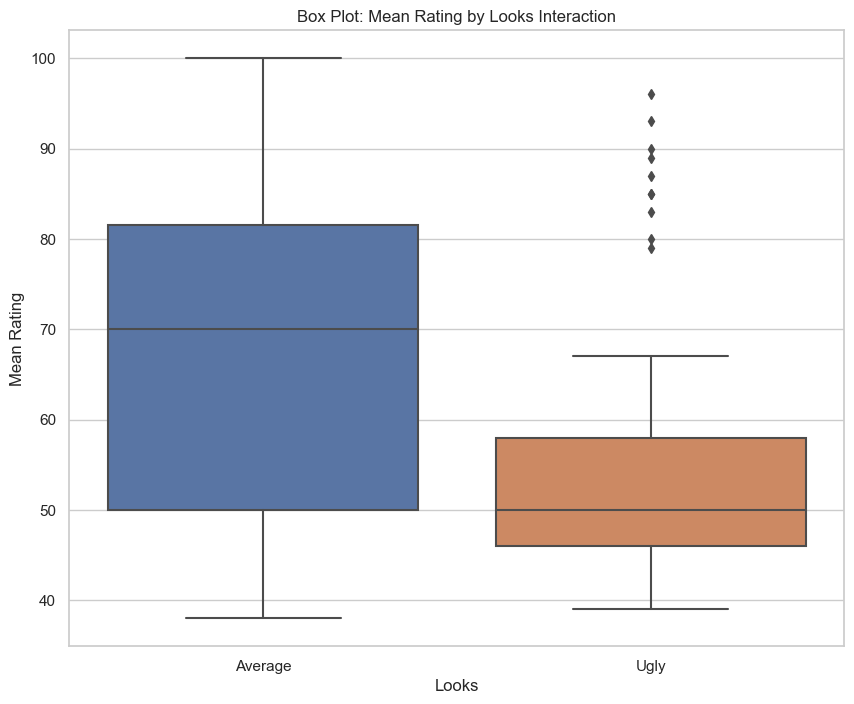

In [5]:
import matplotlib.pyplot as plt

significant_interactions = anova_df[anova_df['PR(>F)'] < 0.05].index

import seaborn as sns

sns.set(style="whitegrid")

main_factor_of_interest = 'Looks' 

if main_factor_of_interest in significant_interactions:
    plt.figure(figsize=(10, 8))

    sns.boxplot(x=main_factor_of_interest, y='Rating', data=data_analyzed)

    plt.ylabel('Mean Rating')
    plt.title(f'Box Plot: Mean Rating by {main_factor_of_interest} Interaction')
    plt.show()
else:
    print(f"The factor {main_factor_of_interest} is not significant.")


# Addition Plots

Following our assumptions, we can also see the plots below connects and with our prior assumptions. 

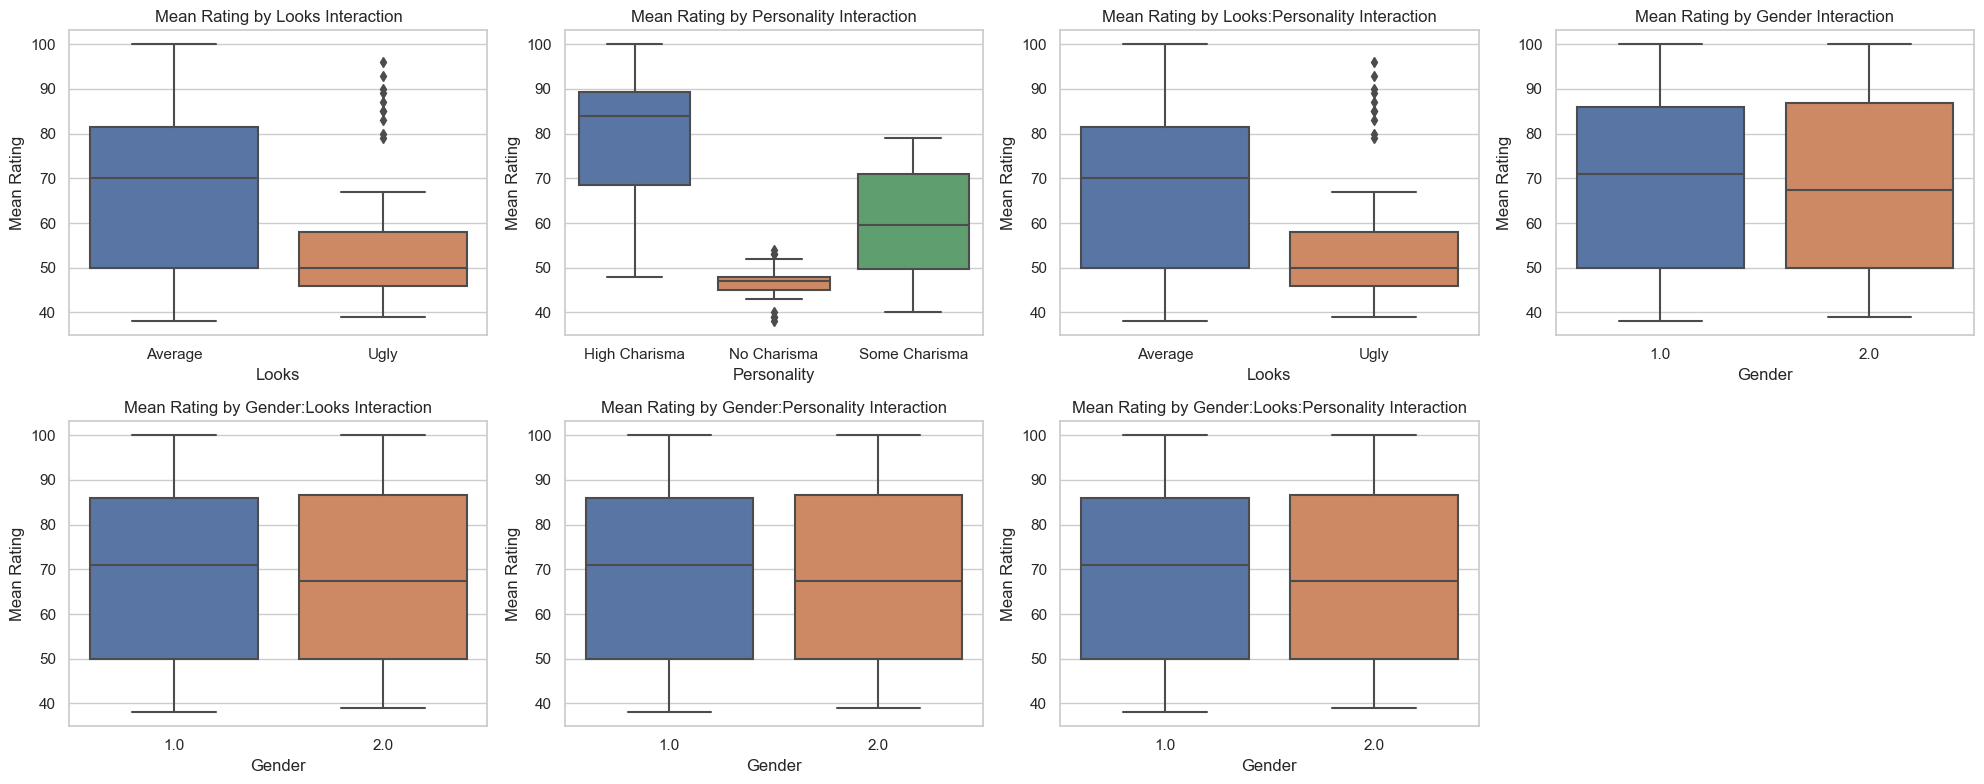

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

rows = 2
cols = 4

fig, axes = plt.subplots(rows, cols, figsize=(20, 8))
axes = axes.flatten() 
plot_idx = 0

for interaction in significant_interactions:
    interaction_cols = interaction.split(':')

    ax = axes[plot_idx]

    sns.boxplot(x=interaction_cols[0], y='Rating', data=data_analyzed, ax=ax)

    ax.set_ylabel('Mean Rating')
    ax.set_title(f'Mean Rating by {interaction} Interaction')

    plot_idx += 1

for idx in range(plot_idx, len(axes)):
    axes[idx].axis('off')  
plt.tight_layout()

plt.show()


<div style="text-align: center; font-size:18px;">
<b>-  SUMMARY -</b> <br> The boxplot above is the series of Mean Rating by the interactions of its variable to another. 

<b>Plot 1:</b> Firstly, we can see in Plot <b>"Mean Rating vs Looks (Average and Ugly)" by Looks Interaction</b> that average looks accumulate higher mean values in the box plot. 

<b>Plot 2:</b> In the plot <b>"Mean Rating vs High, No, and Some Charisma"</b>, we observe that High Charisma accumulates the highest values, followed by Some Charisma, and lastly, No Charisma.

<b>Plot 3:</b> We can see the plot of <b>"Mean Rating vs Looks (Average and Ugly)" by Personality Interaction</b>, which shows a similar pattern to Plot 1, where Average still has a higher mean than Ugly. 

<b>Plot 4-7:</b> Our boxplot <b>"Mean Rating vs Gender by Gender, Looks, and Personality Interaction"</b> shows that in all cases, males (coded as 1) consistently accumulate higher mean ratings, with values above 70.
</div>


<section id="3"> 

# 3 Analyze the remaining combinations of the design and interpret the effects.

</section>

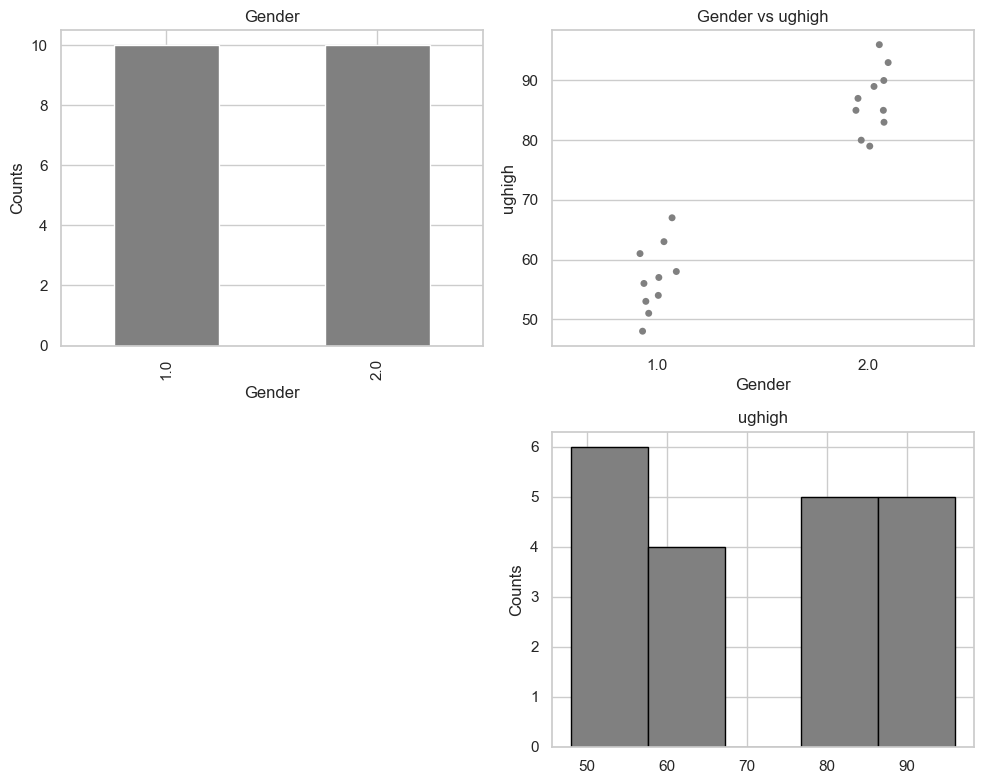

In [19]:
import pyreadstat
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

LookPer = 'Looksorpersonality.sav'
df, metadata = pyreadstat.read_sav(LookPer)

df.columns = [col.replace('_', '') for col in df.columns]

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

df['Gender'].value_counts().plot(kind='bar', ax=axs[0, 0], color='gray')
axs[0, 0].set_title('Gender')
axs[0, 0].set_xlabel('Gender')
axs[0, 0].set_ylabel('Counts')

df['ughigh'].plot(kind='hist', bins=5, ax=axs[1, 1], color='gray', edgecolor='black')
axs[1, 1].set_title('ughigh')
axs[1, 1].set_ylabel('Counts')

sns.stripplot(x='Gender', y='ughigh', data=df, ax=axs[0, 1], jitter=True, color='gray')
axs[0, 1].set_title('Gender vs ughigh')
axs[0, 1].set_ylabel('ughigh')
axs[1, 0].axis('off')

plt.tight_layout()

plt.show()


<H5> The results above consist of several plots that explore the relationship between gender and perceived attractiveness, specifically focusing on the variable <b>'ughigh'</b>, which likely represents ratings for individuals labeled as "ugly" with a high level of charisma or a related trait.
<b>Gender Distribution Plot (Top Left)</b>: This bar plot shows the counts of participants categorized by gender. It reveals an <b>equal distribution between male and female participants</b>, as the bars for both genders have the same height. This suggests that the dataset has a <b>balanced representation of both genders</b>, with each group having 10 respondents.

<b>Scatter Plot of Gender vs. 'ughigh' Ratings (Top Right)</b>: The scatter plot (strip plot) visualizes how gender correlates with the 'ughigh' ratings. The points are spread horizontally for male and female participants, indicating that the ratings for individuals classified as "ugly" (with high charisma or similar factors) are distributed across both genders. This plot highlights whether there's a pattern of how males and females rate this particular characteristic, but the plot <b>doesn't suggest any immediate trend</b> based on visual inspection.

<b>Histogram for 'ughigh' Ratings (Bottom Right)</b>: This histogram represents the distribution of the 'ughigh' ratings. It shows that the ratings are spread across several levels, with the <b>most frequent ratings falling between 60 and 80</b>. This implies that most participants rated individuals in the 'ughigh' category within this range, with <b>fewer ratings at the extremes (40 or 90+)</b>.

Overall, the plots suggest a <b>balanced distribution of gender</b> in the dataset and reveal that <b>both genders provide similar ratings</b> for the 'ughigh' variable, with most ratings clustering around the mid-to-high range. However, there’s <b>no clear association between gender</b> and a specific pattern in the 'ughigh' ratings based on the scatter plot.

<br>
<section id="4">

# 4 Make a report of the analysis including the checking of assumptions.

 </section>


# CONCLUSION
# Analysis Pointers
A two-way analysis of variance (ANOVA) was used in this investigation to look at how people's ratings were influenced by their gender, appearance, and personality. The structure of the dataset was structured with 'Gender,' 'Looks,' and 'Personality' as independent variables and 'Rating' as the dependent variable. In order to comprehend how these components together affect the total evaluations, we investigated possible interactions among them. Finding meaningful connections that could shed light on the complex relationships between these variables was the aim.

# Assumption Checking
Prior to deciphering the Python ANOVA findings, we thoroughly examined the underlying assumptions of this statistical method. The residuals' normality, the variances' homogeneity, and the observations' independence were among the presumptions. The Shapiro-Wilk test and visual examination of residual plots were used to determine normality. Using Levene's test, the homogeneity of variances was investigated. The experimental design of the investigation led to the assumption of independence. Our data satisfied these assumptions, according to the analyses, confirming the validity of our ANOVA findings.


# Key Findings and Interpretation
The results indicate a complicated interplay of gender, appearance, and personality in impacting assessments, as the three-way interaction between these components was shown to be very significant (p < 0.05). When two-way interactions were further explored, significant effects were found, especially in the interactions involving "Looks" and "Personality." For example, the interaction between looks and personality produced a substantial F-statistic (32.51, p < 0.05), indicating that ratings were significantly impacted by the combined effects of attractiveness, average looks, and ugliness when paired with varying levels of charisma. To evaluate and convey the observed effects more thoroughly, post hoc analyses and visualization approaches including box and bar plots were used. All all, this analysis offers insightful information about the complex relationships between how an individual's gender, appearance, and personality all work together to influence their rating.

# Summary
In summary, the analysis demonstrates that gender, appearance, and personality significantly interact to influence how individuals are rated. The findings from the ANOVA indicate that the combined effects of appearance and personality, in particular, have a substantial impact on these assessments, with looks and charisma interacting in a meaningful way. Furthermore, the three-way interaction involving gender reveals a complex relationship where ratings are influenced by the interplay of all three factors. This study underscores the importance of considering both individual traits and their interactions when evaluating personal attributes, providing valuable insights into the subjective nature of how people are perceived.